# Task 1. Supervised Learning

## 1. Introduction and Aims

Supervised learning is... < Give brief description >

The aim of this task is to compare the performance (accuracy and run time) of two or more machine learning algorithms covered in the lectures.

In order to achive this aim, the folliwng objectivs will be to:

- train the regression models using the training dataset to predict the hourly energy consumption of homes using input features
- evaluate the accuracy and run time of regression algorithms applied using the testing and validation datasets
- establish the best performing algorithm for this data

## 2. Theory

In this task, the performance of algorithm X will be compared to algorthim Y in terms of the pridiction of Z. Here, the theory behind these algorthims is described...

### 2.1 Multiple linear regression

Blah, blah, blah...

$𝑦(𝜃)= θ_{(0)}+θ_{1}𝑥_{1}+θ_{2}𝑥_{2}+θ_{3}𝑥_{3}+ …+θ_{n}𝑥_{𝑛}$

where... blah, blah, blah...

### 2.2 Algo 2
Blah, blah, blah...
### 2.3 Algo 3
Blah, blah, blah...

## 3. Methods

The following methodological steps are followed...

1. Data cleaning
2. Feature selection
3. Training, testing, blah, blah, ...

In [9]:
#import the packages and modules required for this task 
import pandas as pd
#import other modules required here...

In [11]:
#read in the smart home data

#fields = ['TimeSeriesVariable1573', 'TimeSeriesVariable1574']
data = '/Users/PhilSymonds/Documents/workspace/mlsb-sbde/Task1/2070091/REFIT_TIME_SERIES_VALUES.csv'

df = pd.read_csv(data)

print(df.head())

  TimeSeriesVariable/@id              dateTime    data
0    TimeSeriesVariable1  2013-10-02T05:00:00Z  17.772
1    TimeSeriesVariable1  2013-10-02T05:30:00Z  18.081
2    TimeSeriesVariable1  2013-10-02T06:00:00Z  18.176
3    TimeSeriesVariable1  2013-10-02T06:30:00Z  18.176
4    TimeSeriesVariable1  2013-10-02T07:00:00Z  18.105


In [103]:
#define a function to extract a particular data series from the data
def extract_data(var_id = 'TimeSeriesVariable15', col_name = 'Temp'):
    #select the data to use
    some_values = [var_id]

    df_sel = df.loc[df['TimeSeriesVariable/@id'].isin(some_values)]
    #print('Here: ')
    #print(df_sel)
    
    #some data maniputlation
    #set the DateTime as a date time object and the index
    format = '%Y-%m-%d %H:%M:%S'
    df_sel['dateTime_ix'] = pd.to_datetime(df_sel['dateTime'], format=format)
    df_sel = df_sel.set_index(pd.DatetimeIndex(df_sel['dateTime_ix']))

    #sel only useful vars
    df_sel = df_sel[['data']]
    #set the col name
    df_sel.rename(columns={'data': col_name}, inplace=True)
    
    #show the conversion worked:
    #print(df_sel.dtypes)
    return df_sel

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


                     Int Temp  Ext Temp
dateTime_ix                            
2014-06-18 11:00:00    23.004     17.02
2014-06-18 11:15:00    23.100     17.88
2014-06-18 11:30:00    23.196     18.80
2014-06-18 11:45:00    23.292     19.14
2014-06-18 12:00:00    23.388     19.89


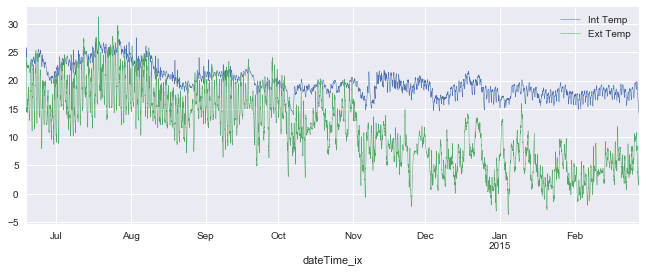

In [92]:
#plot some data
df_sel = extract_data(var_id = 'TimeSeriesVariable15', col_name = 'Int Temp')
#rename column

df_sel2 = extract_data(var_id = 'TimeSeriesVariable1573', col_name = 'Ext Temp')
#print(df_sel)
#print(df_sel2)
##merge the two dfs on the datetime index
df_merge=pd.merge(df_sel,df_sel2, how='inner', left_index=True, right_index=True) 

print(df_merge.head())

##plot the time series:
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

df_merge[['Int Temp', 'Ext Temp']].plot(linewidth=0.5);

In [108]:
#plot the gas or ele usage
#plot some data
#df_sel = extract_data(var_id = 'TimeSeriesVariable1555', col_name = 'Gas')
df_sel = extract_data(var_id = 'TimeSeriesVariable1587', col_name = 'Ele')
# TimeSeriesVariable1554  Gas volume (B1)
# TimeSeriesVariable1584  Electrical power (B1)
 
#print(df_sel)

sns.set(rc={'figure.figsize':(11, 4)})

df_sel['Ele'].plot(linewidth=0.5);

Here: 
Empty DataFrame
Columns: [TimeSeriesVariable/@id, dateTime, data]
Index: []


TypeError: Empty 'DataFrame': no numeric data to plot